In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os

In [4]:
import torch
from src.capsnet_old import CapsNet
from src.datasets import GraphemesDataset
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

torch.manual_seed(1)

USE_CUDA = True if torch.cuda.is_available() else False
BATCH_SIZE = 100
N_EPOCHS = 30

img_transform = transforms.Compose([
    transforms.ToTensor(),
])

ds_type = "moderate"
letter = "aleph"
root_dir = f"datasets/{ds_type}_dataset"

train_dataset = GraphemesDataset(root_dir, train=True, by_letter=letter, transform=img_transform)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

test_dataset = GraphemesDataset(root_dir, train=False, by_letter=letter, transform=img_transform)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)

n_classes = len(train_dataset.classes)

In [3]:
from configs.config import capsnet_config

config = capsnet_config
config.dc_num_capsules = n_classes

capsule_net = CapsNet(config)
capsule_net = torch.nn.DataParallel(capsule_net)
if USE_CUDA:
    capsule_net = capsule_net.cuda()
capsule_net = capsule_net.module

In [23]:
#optimizer = torch.optim.Adam(capsule_net.parameters())

for e in range(1, 10 + 1):
    train(capsule_net, optimizer, train_loader, e, n_classes=n_classes)
    test(capsule_net, test_loader, e, n_classes=n_classes)

  2%|▏         | 1/53 [00:05<04:58,  5.75s/it]

Epoch: [1/30], Batch: [1/53], train accuracy: 0.690000, loss: 0.031486


100%|██████████| 53/53 [04:17<00:00,  4.86s/it]


Epoch: [1/30], train loss: 0.031495
Epoch: [1/30], test accuracy: 0.684370, loss: 2.986420


  2%|▏         | 1/53 [00:04<04:14,  4.89s/it]

Epoch: [2/30], Batch: [1/53], train accuracy: 0.680000, loss: 0.028732


100%|██████████| 53/53 [04:14<00:00,  4.81s/it]


Epoch: [2/30], train loss: 0.028415
Epoch: [2/30], test accuracy: 0.709408, loss: 2.868329


  2%|▏         | 1/53 [00:04<04:06,  4.73s/it]

Epoch: [3/30], Batch: [1/53], train accuracy: 0.750000, loss: 0.026568


100%|██████████| 53/53 [04:22<00:00,  4.96s/it]


Epoch: [3/30], train loss: 0.026927
Epoch: [3/30], test accuracy: 0.730653, loss: 2.772076


  2%|▏         | 1/53 [00:05<04:20,  5.00s/it]

Epoch: [4/30], Batch: [1/53], train accuracy: 0.730000, loss: 0.027445


100%|██████████| 53/53 [04:55<00:00,  5.57s/it]


Epoch: [4/30], train loss: 0.025885
Epoch: [4/30], test accuracy: 0.742033, loss: 2.724989


  2%|▏         | 1/53 [00:06<05:17,  6.11s/it]

Epoch: [5/30], Batch: [1/53], train accuracy: 0.770000, loss: 0.025813


100%|██████████| 53/53 [05:02<00:00,  5.71s/it]


Epoch: [5/30], train loss: 0.024926
Epoch: [5/30], test accuracy: 0.760243, loss: 2.672902


  2%|▏         | 1/53 [00:05<04:31,  5.22s/it]

Epoch: [6/30], Batch: [1/53], train accuracy: 0.780000, loss: 0.023946


100%|██████████| 53/53 [05:07<00:00,  5.79s/it]


Epoch: [6/30], train loss: 0.024120
Epoch: [6/30], test accuracy: 0.766313, loss: 2.633484


  2%|▏         | 1/53 [00:08<07:46,  8.98s/it]

Epoch: [7/30], Batch: [1/53], train accuracy: 0.800000, loss: 0.022924


100%|██████████| 53/53 [04:42<00:00,  5.34s/it]


Epoch: [7/30], train loss: 0.023580
Epoch: [7/30], test accuracy: 0.779211, loss: 2.561162


  2%|▏         | 1/53 [00:04<04:02,  4.66s/it]

Epoch: [8/30], Batch: [1/53], train accuracy: 0.860000, loss: 0.021860


100%|██████████| 53/53 [04:08<00:00,  4.70s/it]


Epoch: [8/30], train loss: 0.022890
Epoch: [8/30], test accuracy: 0.790592, loss: 2.527320


  2%|▏         | 1/53 [00:04<04:16,  4.93s/it]

Epoch: [9/30], Batch: [1/53], train accuracy: 0.830000, loss: 0.020477


100%|██████████| 53/53 [04:18<00:00,  4.88s/it]


Epoch: [9/30], train loss: 0.022317
Epoch: [9/30], test accuracy: 0.789074, loss: 2.463649


  2%|▏         | 1/53 [00:05<04:23,  5.07s/it]

Epoch: [10/30], Batch: [1/53], train accuracy: 0.810000, loss: 0.022317


100%|██████████| 53/53 [06:21<00:00,  7.20s/it]


Epoch: [10/30], train loss: 0.021844
Epoch: [10/30], test accuracy: 0.802731, loss: 2.453661


In [24]:
# save model
#torch.save(capsule_net.state_dict(), 
#           os.path.join('pretrained_models', f'capsnet_{letter}_{config.reconstruction_coeff}_rotation_hightune_45.pth'))

# load model
#capsule_net.load_state_dict(torch.load(os.path.join('pretrained_models', f'capsnet_{letter}_{config.reconstruction_coeff}_rotation_hightune_45.pth')))

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import torchvision.utils
from torch.autograd import Variable
import numpy as np

capsule_net.eval()

def to_img(x):
    x = x.clamp(0, 1)
    return x

def show_image(img):
    img = to_img(img)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
        

def visualise_output(images, model):

    with torch.no_grad():
        images = Variable(images)
        _, images, _ = model(images)
        images = images.cpu()
        images = to_img(images)
        np_imagegrid = torchvision.utils.make_grid(images[:50], 10, 5).numpy()
        plt.imshow(np.transpose(np_imagegrid, (1, 2, 0)))
        plt.show()


Original images


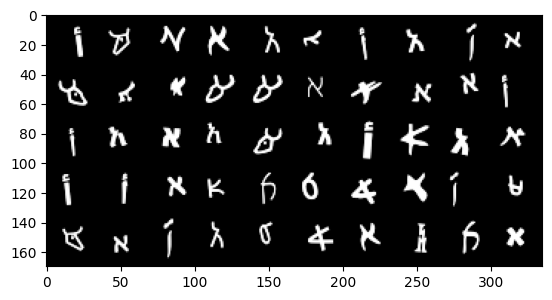

Reconstructions


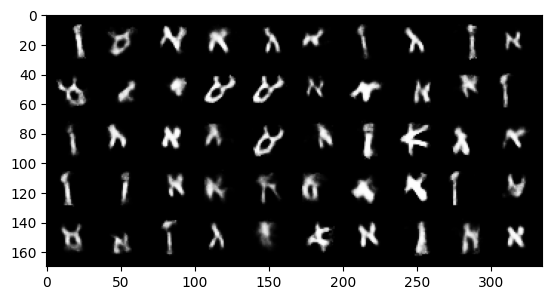

In [32]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

output, reconstructions, masked = capsule_net(images)

# First visualise the original images
print('Original images')
show_image(torchvision.utils.make_grid(images[:50],10,5))
plt.show()

# Visualise the reconstructions
print('Reconstructions')
visualise_output(images, capsule_net)


In [8]:
masked.shape

torch.Size([100, 13])